# Project 3 - Clustering

In this project we will apply the clustering methods from the lectures to the famous Iris dataset. Note that while this dataset contains labels we will not use these for clustering since we are in the unsupervised learning setting.

We will start by importing some useful python libraries and the dataset.

In [90]:
import numpy as np # Used for its array data structure and other useful functions
import pandas as pd # Used for its DataFrame
from sklearn.datasets import load_iris # Iris dataset

## Libaries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing and Analysis

Lets print the dataset description to get a better understanding of the data.

In [91]:
iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

As we can see from the description we have 150 instances, 4 features and 3 classes corresponding to different species of the Iris plant. Lets load the dataset into a dataframe and have a look at the first few rows.

In [92]:
iris_df = iris.frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Since the dataset has 4 features and visualizing a 4 dimensional space is challenging we will start by reducing the dimensionality of the dataset. In this case a natural way to summarize the data into 2 features is to combine the width and length measures into a single measure of size. A simple but rough solution is to simply multiply the width with the length. For the purposes of this project this will suffice.

In [93]:
iris_df_2D = pd.DataFrame() # Create a new DataFrame
iris_df_2D['sepal size (cm^2)'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']
iris_df_2D['petal size (cm^2)'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df_2D['target'] = iris_df['target']

In [94]:
iris_df_2D.head()

,sepal size (cm^2),petal size (cm^2),target
0,17.85,0.28,0
1,14.70,0.28,0
2,15.04,0.26,0
3,14.26,0.30,0
4,18.00,0.28,0


Before peforming clustering it is also useful to gain a better understanding of the data by visualizing it. We can plot a scatterplot of the features and color the points by their target values.

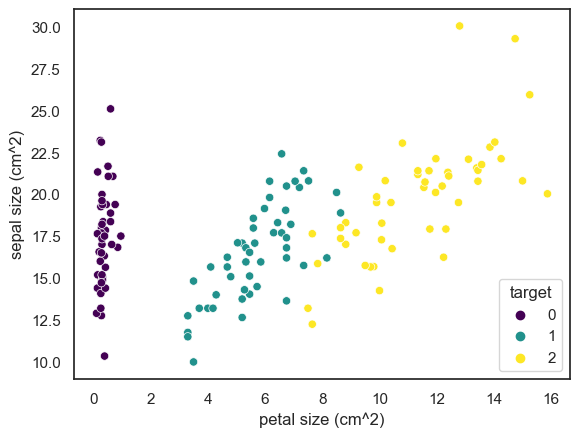

In [95]:
sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="target", palette="viridis");
#changed to viridis since I'm a bit colorblind

From the scatterplot we see that species 0 is clearly separated from the other two species. Species 1 and 2 seem to be more intertwined. 

We are now ready to separate the target variable from the features and apply our first clustering method.

In [96]:
target = iris_df_2D['target'] 
features = iris_df_2D.drop('target', axis=1)

## K-Means

The first method we will apply is K-Means Clustering. We will use the `KMeans` class from `sklearn`.

<strong>Task 1</strong> Assume that we have no knowledge of the number of clusters in the dataset. Apply K-Means clustering to the features with k=2,3,4,5,6,7,8,9 and create an elbow plot to determine the optimal value for k. Use the sum of squared distances of the observations to their closest cluster center to evaluate the clustering performance for each value of k.

In [97]:
from sklearn.cluster import KMeans

k_values = [2, 3, 4, 5, 6, 7, 8, 9]

sum_sd = []

for k in k_values:
    clustering = KMeans(n_clusters=k, random_state=5, n_init="auto") 
    clustering.fit(features)
    sum_sd.append(clustering.inertia_) #add the Sum of squared distances of samples to their closest cluster center to the variable




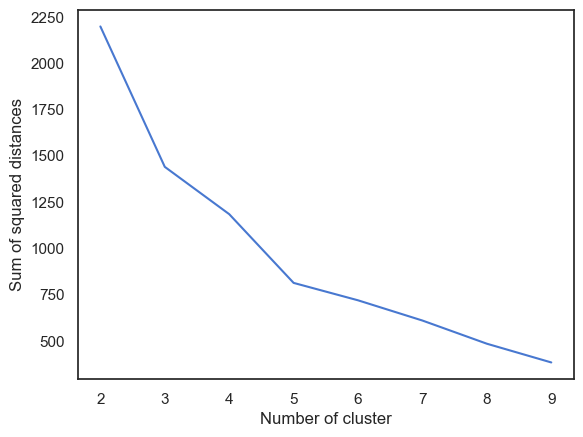

In [98]:
#Elbow plot

plt.figure()
plt.plot(k_values, sum_sd)
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")
plt.show()

<strong>Task 2</strong> Is there a clear elbow in the plot highlighting the optimal value for k? Explain why the elbow plot may not always show a clear elbow.

There might be several  ways for the algorithm to cluster depending on the data that is being analysed, e.g. there are no distinctive clusters and in this case both 3 and 5 are both quite optimal.

Elbow plots may not always be clear and can vary from person to person what they choose is the elbow, in this case both 3 and 5 could be the elbow.

<strong>Task 3</strong> Apply K-Means with k=3 and visualize the clusters in a scatterplot of the features with points colored by their cluster labels. How do the clusters found by K-Means compare to the known target values? 

In [99]:
clustering = KMeans(n_clusters=3, random_state=599, n_init="auto") 
clustering.fit(features)

KMeans(n_clusters=3, n_init='auto', random_state=599)

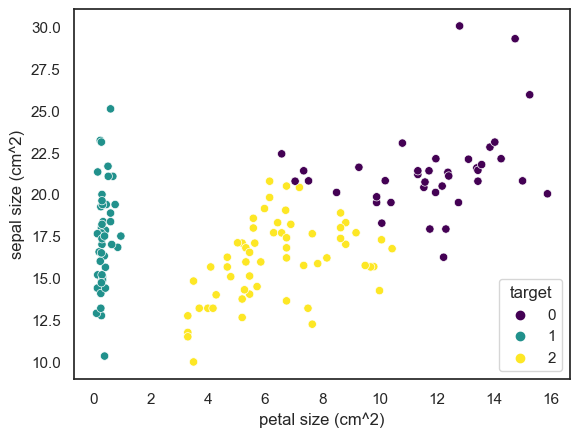

In [100]:
iris_df_2D['target'] = clustering.labels_

sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="target", palette="viridis");


## DBSCAN

We will now apply DBSCAN using the `DBSCAN` class from `sklearn`. 

<strong>Task 4</strong> Experiment with different values for the DBSCAN parameters `eps` and `min_samples` until you arrive at a reasonable clustering result.

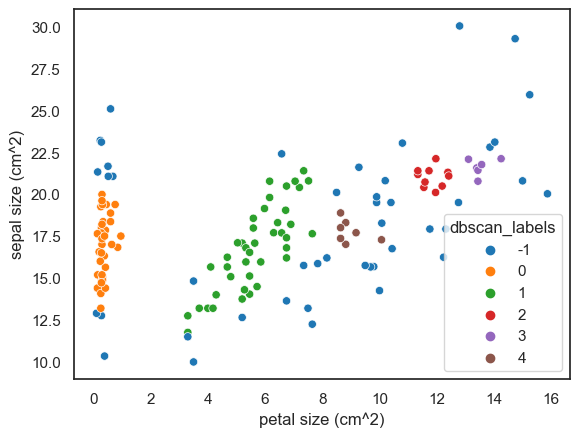

In [101]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5).fit(features)
iris_df_2D['dbscan_labels'] = dbscan.labels_

sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="dbscan_labels", palette="tab10");

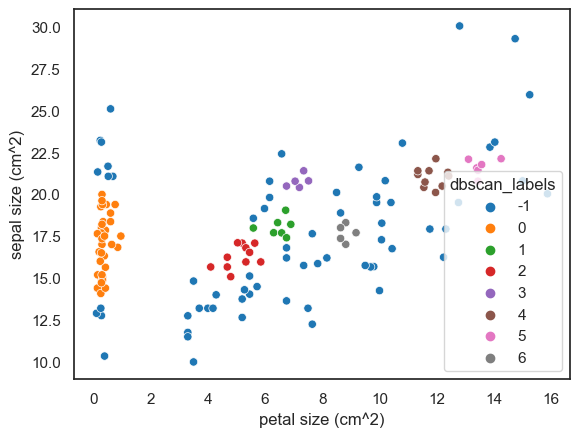

In [102]:
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(features)
iris_df_2D['dbscan_labels'] = dbscan.labels_

sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="dbscan_labels", palette="tab10");

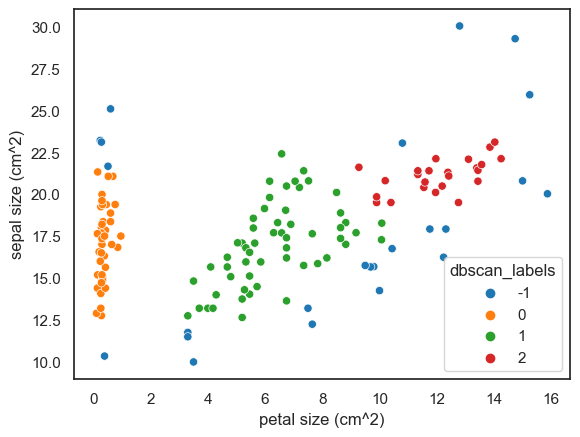

In [103]:
dbscan = DBSCAN(eps=1.4, min_samples=7).fit(features)
iris_df_2D['dbscan_labels'] = dbscan.labels_

sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="dbscan_labels", palette="tab10");

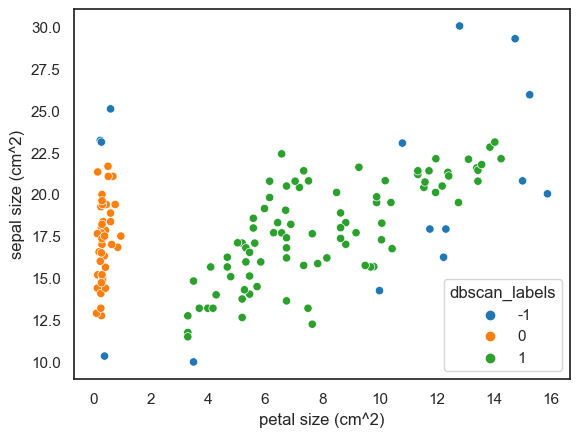

In [104]:
dbscan = DBSCAN(eps=1.4, min_samples=3).fit(features)
iris_df_2D['dbscan_labels'] = dbscan.labels_

sns.scatterplot(data=iris_df_2D, x='petal size (cm^2)', y='sepal size (cm^2)', 
                hue="dbscan_labels", palette="tab10");

<strong>Task 5</strong> Explain what the `eps` parameter controls and how it affects the clustering results. Will increasing `eps` tend to increase or decrease the number of clusters? Make sure to motivate your answer with a clear but concise explanation.

EPS is according to definition: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
My understanding is the max distance of other data points to the Core Point or data point for it to be considered within the cluster.

By increasing the EPS AND keeping the number of samples the same will often decrease the number of clusters, due to more Core Points being added and thus making the clusters bigger.

<strong>Task 6</strong> Explain what the `min_samples` parameter controls and how it affects the clustering results. Will increasing `min_samples` tend to increase or decrease the number of noise points? Make sure to motivate your answer with a clear but concise explanation.

This parameter affects how many points has to be within "Range" or EPS for it to be considered a Core Point. 

Therefore if the parameter is decreased, there will be smaller clusters or more sparse clusters, while increasing the value will create bigger or denser clusters.
